# Assignment 6b

In [1]:
import numpy as np
import matplotlib.pyplot as plt
class LogisticRegression:
    sigmoid=lambda z:  1 / (1 + np.exp(-z))
    def __init__(self) -> None:#just initialzing an empty object.
        self.weights=[]
    def fit(self,X,y,epochs,lr):
        from sklearn.preprocessing import StandardScaler
        scale=StandardScaler()
        x_scled=scale.fit_transform((X))
        x=np.column_stack([np.ones((x_scled.shape[0], 1)), x_scled])
        #making inital guess
        self.weights=np.random.rand(x.shape[1])
        l=len(x)
        loss_history=[]
        #gradient descent 
        for epoch in range(epochs):
            prds=LogisticRegression.sigmoid((x@self.weights))
            grads=1/l*x.T.dot(prds-y)
            self.weights-=lr*grads
            loss=-1/l*(y.dot(np.log(prds))+(1-y).dot(np.log(1-prds)))
            loss_history+=[loss]
        plt.figure(figsize=(10, 6))
        plt.plot(range(epochs), loss_history, color='green')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss over Iterations')
        plt.show()
    def predict(self,X):
        from sklearn.preprocessing import StandardScaler
        scale=StandardScaler()
        x_scled=scale.fit_transform((X))
        x=np.column_stack([np.ones((x_scled.shape[0], 1)), x_scled])
        prob=LogisticRegression.sigmoid(x@self.weights)
        ypred=(prob>=0.5).astype(int)
        return ypred
    def predict_classes(self,X):
        from sklearn.preprocessing import StandardScaler
        scale=StandardScaler()
        x_scled=scale.fit_transform((X))
        x=np.column_stack([np.ones((x_scled.shape[0], 1)), x_scled])
        prob=LogisticRegression.sigmoid(x@self.weights)
        classes=(prob>=0.5).astype(int) #if its >=0.5 then it'll be assigned class 1.
        return classes
    def evaluate(self,X,y):
        from sklearn.preprocessing import StandardScaler
        from sklearn.metrics import confusion_matrix
        scale=StandardScaler()
        x_scled=scale.fit_transform((X))
        x=np.column_stack([np.ones((x_scled.shape[0], 1)), x_scled])
        prob=LogisticRegression.sigmoid(x@self.weights)
        ypred=(prob>=0.5).astype(int)
        #mat=confusion_matrix(y, ypred)
        accuracy = np.mean(ypred == y)
        return accuracy


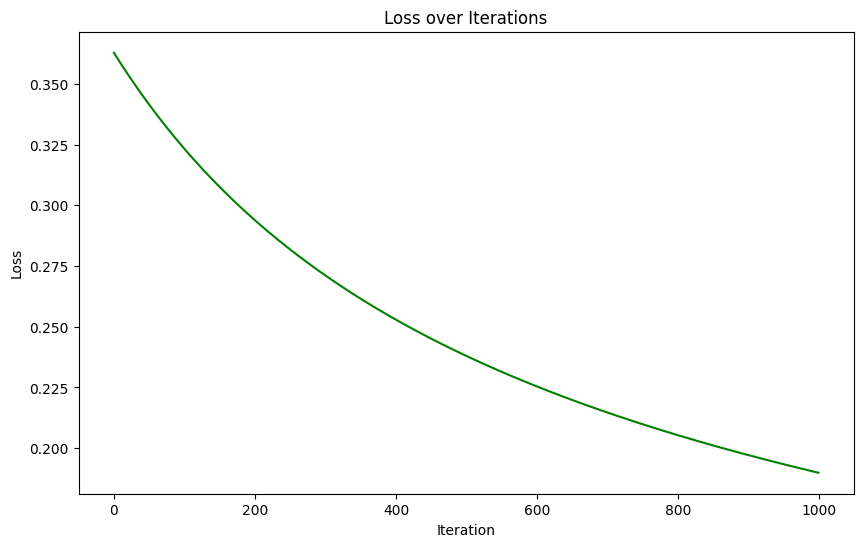

In [2]:
X_log = np.array([[0.5], [1.5], [2.5], [3.5], [4.5]])
y_log = np.array([0, 0, 1, 1, 1])
logistic_model = LogisticRegression()
logistic_model.fit(X_log, y_log, epochs=1000, lr=0.01)

In [4]:
log_predictions = logistic_model.predict(X_log)
log_classes = logistic_model.predict_classes(X_log)
accuracy = logistic_model.evaluate(X_log, y_log)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 1.0


In [5]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = (iris.target != 0) * 1  # Convert to binary classification problem (Setosa vs. Non-Setosa)

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

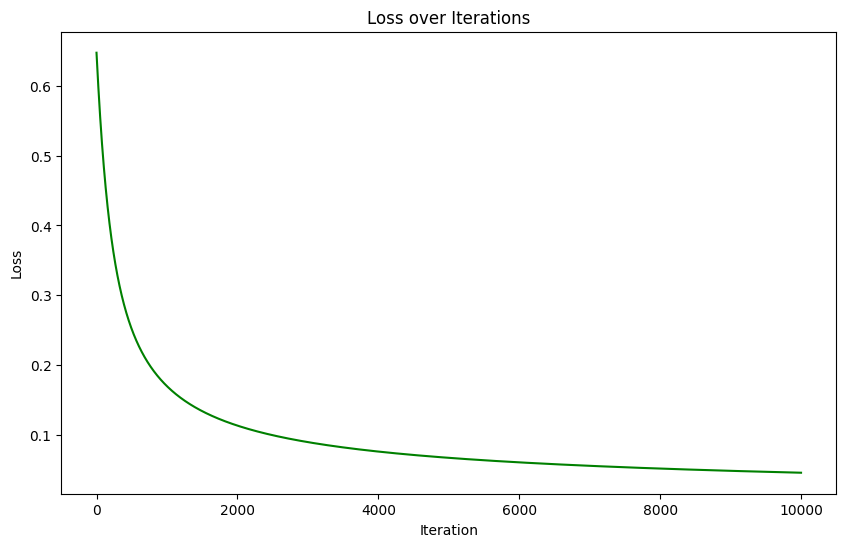

Logistic Regression Accuracy: 0.9933333333333333


In [6]:
logistic1=LogisticRegression()
logistic1.fit(X, y, epochs=10000, lr=0.01)
log_predictions1 = logistic1.predict(X)
log_classes1 = logistic1.predict_classes(X)
accuracy1 = logistic1.evaluate(X, y)
print("Logistic Regression Accuracy:", accuracy1)